# Fundamentals of Physics 12 Edition with python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex
from sympy import symbols, exp, integrate, oo, simplify
import sympy as sp

plt.rcParams['text.usetex'] = True

plt.style.use('seaborn-v0_8')

# CHAPTER 1

----------------------------------------------------------------------------------------


### 14
An electron moving along the x axis has a position given by $ x = 16te^{−t} \ m $, where t is in seconds. How far is the electron from the origin when it momentarily stops?

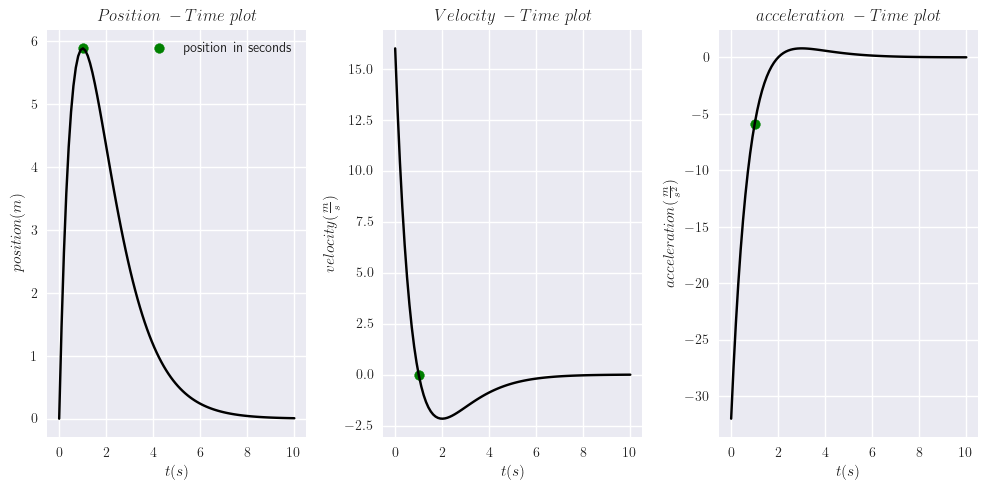

In [2]:
T = np.linspace(0,10,100)
t = sp.symbols('t')

def p(t): return 16*t*sp.exp(-t)
def v(t): return sp.diff(p(t),t)
def a(t): return sp.diff(v(t),t)

p_num = sp.lambdify(t, p(t), 'numpy')
v_num = sp.lambdify(t, v(t), 'numpy')
a_num = sp.lambdify(t, a(t), 'numpy')

t_stop = sp.solve(sp.diff(p(t),t),t)[0]

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].plot(T, p_num(T), color='black')
ax[0].scatter(float(t_stop), p_num(float(t_stop)), color='green', label='position in seconds')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(rf'$ Position \ - Time \ plot $')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(T, v_num(T), color='black')
ax[1].scatter(float(t_stop), v_num(float(t_stop)), color='green', label='position in seconds')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(\frac{m}{s})$')
ax[1].set_title(rf'$ Velocity \ - Time \ plot $')
ax[1].grid(True)

ax[2].plot(T, a_num(T), color='black')
ax[2].scatter(float(t_stop), a_num(float(t_stop)), color='green', label='position in seconds')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(\frac{m}{s^2})$')
ax[2].set_title(rf'$ acceleration \ - Time \ plot $')
ax[2].grid(True)

plt.tight_layout()

value of Position in without moving

In [3]:
print(f'{p_num(int(t_stop)):.3f} m')

5.886 m


----------------------------------------------------------------------------------------

### 15
(a) If a particle’s position is given by $ x = 4 − 12t + 3t^2 $ (where t is in seconds and $x$ is in meters), what is its velocity at $t = 1 s$?

(b) Is it moving in the positive or negative direction of $x$ just then? (c) What is its 
speed just then?

(d) Is the speed increasing or decreasing just then? (Try answering the next two questions without further calculation.)

(e) Is there ever an instant when the velocity is zero? If so, give the time $t$; if not, answer no. 

(f) Is there a time after $ t = 3 s $ when the particle is moving in the negative direction of $x$? If so, give the time $t$; if not, answer no.

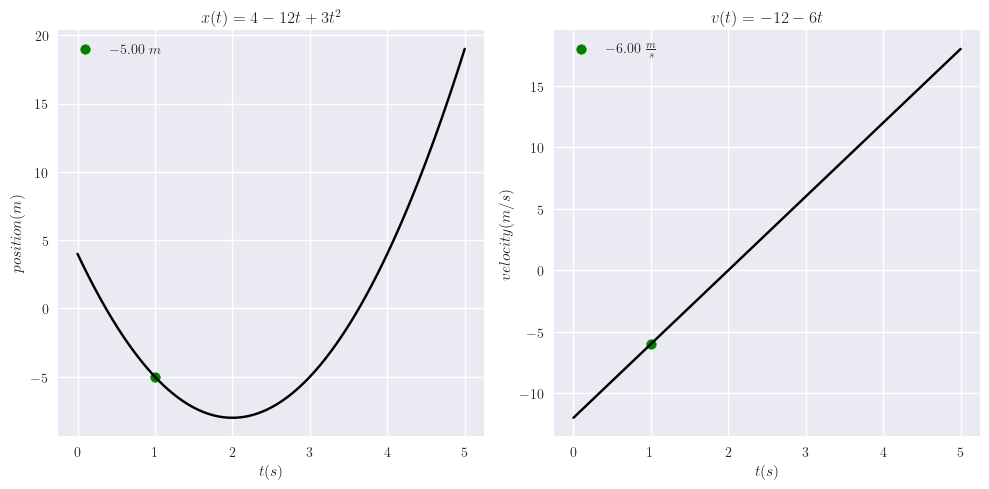

In [4]:
def x_15(t): return 4 - 12*t + 3*t**2
def v_15(t): return sp.diff(x_15(t),t)
def a_15(t): return sp.diff(v_15(t),t)

v_num15 = sp.lambdify(t, v_15(t), 'numpy')
a_num15 = sp.lambdify(t, a_15(t), 'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))
T = np.linspace(0,5,100)

ax[0].plot(T, x_15(T), color='black')
ax[0].scatter(1, x_15(1), color='green', label=rf'$ {x_15(1):.2f} \ m $')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(rf'$x(t)= 4 - 12t + 3t^2$')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(T, v_num15(T), color='black')
ax[1].scatter(1, v_num15(1), color='green', label=rf'$ {v_num15(1):.2f} \ \frac{{m}}{{s}} $')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(rf'$v(t)= -12-6t$')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

$$ x(t) = 4 − 12t + 3t^2 $$
$$ v(t) = 6t - 12 $$
$$ a(t) = 0 $$

In [5]:
# answers values
print(f'(a): {v_num15(1)} m/s')
print(f'(b): negative position')
print(f'(c): {abs(v_num15(1))} m/s')
print(f'(d): increase')
print(f'(e): {sp.solve(v_15(t),t)[0]}s')

(a): -6 m/s
(b): negative position
(c): 6 m/s
(d): increase
(e): 2s


(e): no because $ \frac{dx(t)}{dt}: 6t-12 $ and in $v(t)=0$ have just one answer($t=2$).

so in $ t > 2 $ we don't have decreases velocity.

----------------------------------------------------------------------------------------

### 16
The position function $x(t)$ of a particle moving along an x axis is $x = 4.0 − 6.0t^2$, with $x$ in meters and $t$ in seconds.

(a) At what time and (b) where does the particle (momentarily) stop?
At what (c) negative time and (d) positive time does the particle pass through the origin?

(e) Graph $x$ versus $t$ for the range $−5 s$ to $+5 s$. (f) To shift the curve rightward on the graph, should we include the term $+20t$ or the term $−20t$ in $x(t)$?

(g) Does that inclusion increase or decrease the value of $x$ at which the particle momentarily stops?

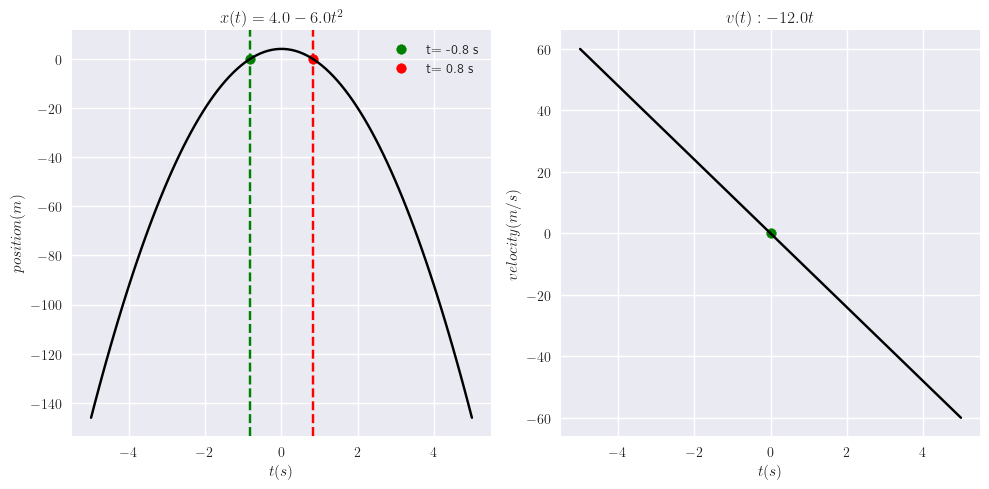

In [6]:
def x_16(t): return 4.0 - 6.0*t**2
def v_16(t): return sp.diff(x_16(t),t)
def a_16(t): return sp.diff(v_16(t),t)

v_num16 = sp.lambdify(t, v_16(t), 'numpy')
a_num16 = sp.lambdify(t, a_16(t), 'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))

T = np.linspace(-5,5,100)

ax[0].axvline(sp.solve(x_16(t),t)[0],color='green', linestyle='dashed')
ax[0].axvline(sp.solve(x_16(t),t)[1],color='red', linestyle='dashed')
ax[0].scatter(sp.solve(x_16(t),t)[0],x_16(sp.solve(x_16(t),t)[0]),color='green',label=rf't= {sp.solve(x_16(t),t)[0]:.1f} s')
ax[0].scatter(sp.solve(x_16(t),t)[1],x_16(sp.solve(x_16(t),t)[1]),color='red',label=rf't= {sp.solve(x_16(t),t)[1]:.1f} s')
ax[0].plot(T,x_16(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)= 4.0 - 6.0t^2$')
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(sp.solve(v_16(t),t)[0],v_num16(sp.solve(v_16(t),t)[0]),color='green')
ax[1].plot(T,v_num16(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t): -12.0t$')
ax[1].grid(True)

plt.tight_layout()

$$ x(t) = 4.0 − 6.0t^2 $$
$$ v(t) = -12.0t $$
$$ a(t) = -12.0 $$

In [7]:
print(f'(a): 0 s')
print(f'(b): 4.0 m')
print(f'(c): {sp.solve(x_16(t),t)[0]:.3f} s, {sp.solve(x_16(t),t)[1]:.3f} s')
print(f'(f): 20t')

(a): 0 s
(b): 4.0 m
(c): -0.816 s, 0.816 s
(f): 20t


(g): 
$$ x(t)_{new} = 4.0 - 6.0t^2 + 20 t $$
$$ x(0)_{new} = 4.0 m $$

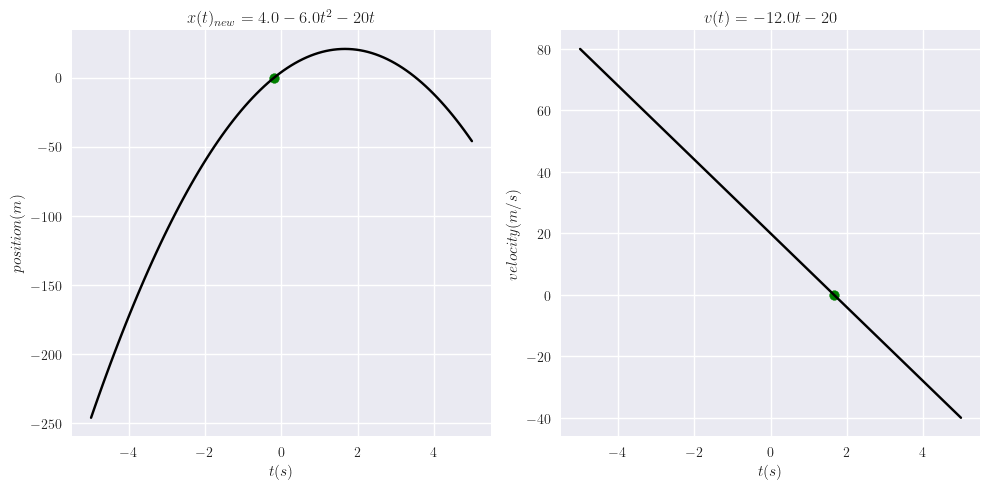

In [8]:
def x_16new(t) : return  x_16(t) + 20*t
def v_16new(t) : return sp.diff(x_16new(t),t)
def a_16new(t) : return sp.diff(v_16new(t),t)

v_num16new = sp.lambdify(t, v_16new(t),'numpy')
a_num16new = sp.lambdify(t, a_16new(t),'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(sp.solve(x_16new(t),t)[0],x_16new(sp.solve(x_16new(t),t)[0]),color='green')
ax[0].plot(T, x_16new(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)_{new} = 4.0 - 6.0t^2 - 20 t$')
ax[0].grid(True)

ax[1].scatter(sp.solve(v_16new(t),t)[0],v_num16new(sp.solve(v_16new(t),t)[0]),color='green')
ax[1].plot(T, v_num16new(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = -12.0t - 20$')
ax[1].grid(True)

plt.tight_layout()

----------------------------------------------------------------------------------------

# 17

The position of a particle moving along the $x$ axis is given in centimeters by $x = 9.75 + 1.50t^3$, where t is in seconds.

Calculate (a) the average velocity during the time interval $t = 2.00 s$ to $t = 3.00 s$; 

(b) the instantaneous velocity at $t = 2.00 s$;

(c) the instantaneous velocity at $t = 3.00 s$; 

(d) the instantaneous velocity at $t = 2.50 s$; 

(e) the instantaneous velocity when the particle is midway between its positions at $t = 2.00 s$ and $t = 3.00 s$.

(f) Graph $x$ versus $t$ and indicate your answers graphically.

In [9]:
def x_17(t): return 9.75 + 1.5*t**3
def v_17(t): return sp.diff(x_17(t),t)
def a_17(t): return sp.diff(v_17(t),t)

v_num17 = sp.lambdify(t,v_17(t),'numpy')
a_num17 = sp.lambdify(t,a_17(t),'numpy')

(a):
$$ V_{avg} = \frac{\Delta x}{\Delta t} = \frac{x_f - x_i}{t_f - t_i} = \frac{x(3.00) - x(2.00)}{3.00 - 2.00}$$

In [10]:
print(x_17(3.00)-x_17(2.00) , 'cm/s')

28.5 cm/s


In [11]:
print(f'(a): {v_num17(2.00)} cm/s')
print(f'(b): {v_num17(3.00)} cm/s')
print(f'(c): {v_num17(2.50):.1f} cm/s')
d = (x_17(3.00) + x_17(2.00)) / 2
t_new = sp.solve(x_17(t) - 36,t)
print(f'(d): {v_num17(t_new[0]):.1f} cm/s')

(a): 18.0 cm/s
(b): 40.5 cm/s
(c): 28.1 cm/s
(d): 30.3 cm/s


$$ x(t)= 9.75 + 1.5t^3 $$
$$ v(t)= 4.5t^2 $$
$$ a(t)= 9.0t $$

(e):

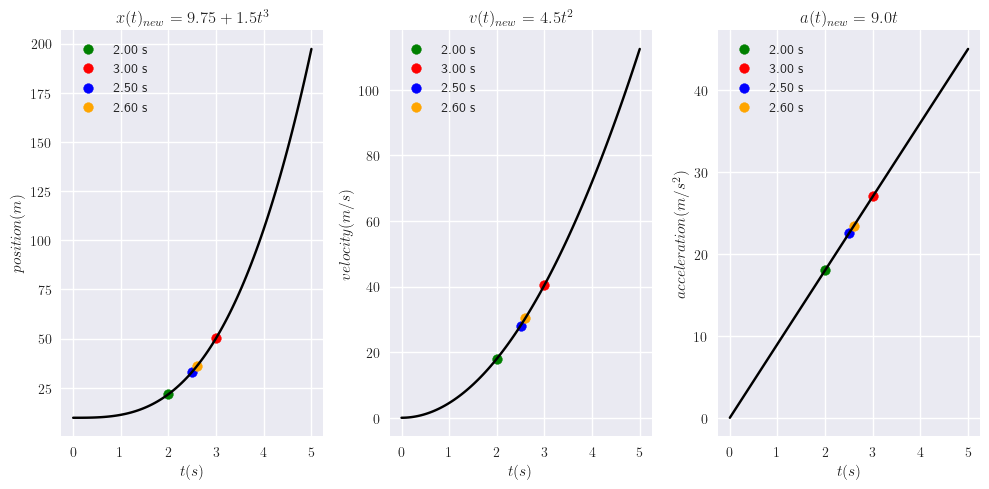

In [12]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

T = np.linspace(0,5,100)

ax[0].scatter(2.00,x_17(2.00),color='green', label='2.00 s')
ax[0].scatter(3.00,x_17(3.00),color='red', label='3.00 s')
ax[0].scatter(2.50,x_17(2.50),color='blue', label='2.50 s')
ax[0].scatter(t_new[0],x_17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[0].plot(T, x_17(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)_{new} = 9.75 + 1.5t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(2.00,v_num17(2.00),color='green', label='2.00 s')
ax[1].scatter(3.00,v_num17(3.00),color='red', label='3.00 s')
ax[1].scatter(2.50,v_num17(2.50),color='blue', label='2.50 s')
ax[1].scatter(t_new[0],v_num17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[1].plot(T, v_num17(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t)_{new} = 4.5t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(2.00,a_num17(2.00),color='green', label='2.00 s')
ax[2].scatter(3.00,a_num17(3.00),color='red', label='3.00 s')
ax[2].scatter(2.50,a_num17(2.50),color='blue', label='2.50 s')
ax[2].scatter(t_new[0],a_num17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[2].plot(T, a_num17(T),color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t)_{new} = 9.0t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

----------------------------------------------------------------------------------------

# 18

The position of a particle moving along an $x$ axis is given by $x = 12t^2− 2t^3$, where $x$ is in meters and t is in seconds.
Determine (a) the position, (b) the velocity

(c) the acceleration of the particle at $t = 3.0 s$. 

(d) What is the maximum positive coordinate reached by the particle

(e) at what time is it reached?

(f) What is the maximum positive velocity reached by the particle

(g) at what time is it reached?

(h) What is the acceleration of the particle at the instant the particle is not moving (other than at $t = 0$)?

(i) Determine the average velocity of the particle between $t = 0$ and $t = 3 s$.

In [13]:
def x_18(t): return 12*t**2-2*t**3
def v_18(t): return sp.diff(x_18(t),t)
def a_18(t): return sp.diff(v_18(t),t)

v_num18 = sp.lambdify(t,v_18(t),'numpy')
a_num18 = sp.lambdify(t,a_18(t),'numpy')

$$ x(t)= 12t^2-2t^3 $$
$$ v(t)= 24t-6t^2 $$
$$ a(t)= 24-12t $$

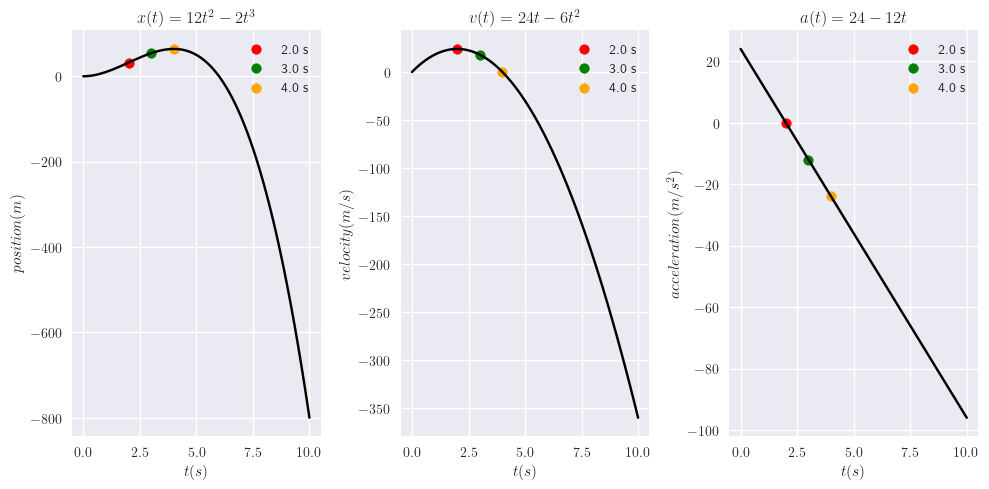

In [14]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

T = np.linspace(0,10,100)

ax[0].scatter(2.0,x_18(2.0),color='red', label='2.0 s')
ax[0].scatter(3.0,x_18(3.0),color='green', label='3.0 s')
ax[0].scatter(4.0,x_18(4.0),color='orange', label='4.0 s')
ax[0].plot(T, x_18(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t) = 12t^2-2t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(2.0,v_num18(2.0),color='red', label='2.0 s')
ax[1].scatter(3.0,v_num18(3.0),color='green', label='3.0 s')
ax[1].scatter(4.0,v_num18(4.0),color='orange',label='4.0 s')
ax[1].plot(T, v_num18(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = 24t-6t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(2.0,a_num18(2.0),color='red', label='2.0 s')
ax[2].scatter(3.0,a_num18(3.0),color='green', label='3.0 s')
ax[2].scatter(4.0,a_num18(4.0),color='orange', label='4.0 s')
ax[2].plot(T, a_num18(T),color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t) = 24-12t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

In [15]:
print(f'(a): x(3.0)= {x_18(3.0)} m')
print(f'(b): v(3.0)= {v_num18(3.0)} m/s')
print(f'(c): a(3.0)= {a_num18(3.0)} m/s^2')
print(f'(e): x(4.0)= {x_18(sp.solve(v_num18(t),t)[1])} m')
print(f'(f): {sp.solve(a_num18(t),t)[0]} s')
print(f'(g): {v_num18(sp.solve(a_num18(t),t)[0])} m/s')
print(f'(h): {a_num18(sp.solve(v_num18(t),t)[1])} m/s')
print(f'(i): {(x_18(3.0) - x_18(0)) / 3} m/s')

(a): x(3.0)= 54.0 m
(b): v(3.0)= 18.0 m/s
(c): a(3.0)= -12.0 m/s^2
(e): x(4.0)= 64 m
(f): 2 s
(g): 24 m/s
(h): -24 m/s
(i): 18.0 m/s


(i):
$$ V_{avg} = \frac{\Delta x}{\Delta t} = \frac{x_f - x_i}{t_f - t_i} = \frac{x(3.0) - x(0)}{3.0 - 0}$$

----------------------------------------------------------------------------------------

# 19

At a certain time a particle had a speed of $18 m/s$ in the positive $x$ direction, and $2.4 s$ later its speed was $30 m/s$ in the opposite direction. What is the average acceleration of the particle during this $2.4 s$ interval?

$$ v_1 = 18 \frac{m}{s} , \ t_1 $$
$$ v_2 = -30 \frac{m}{s} , \ t_2 = t_1 + 2.4 s $$
$$ a_{avg} = \frac{v_f - v_i}{t_f - t_i} = \frac{-30-18}{(2.4+t_1) - t_1} = \frac{-48}{2.4} m/s^2 = -20 m/s^2 $$

----------------------------------------------------------------------------------------

# 20

At a certain time a particle had a speed of $18 m/s$ in the positive $x$ direction, and $2.4 s$ later its speed was $30 m/s$ in the opposite direction. What is the average acceleration of the particle during this $2.4 s$ interval?

$$ x(t) = 20 - 5t^3 $$
$$ v(t) = 2- 15t^2 $$
$$ a(t) = -30t $$

In [16]:
def x_20(t): return 20*t-5*t**3
def v_20(t): return sp.diff(x_20(t),t)
def a_20(t): return sp.diff(v_20(t),t)

v_num19 = sp.lambdify(t,v_20(t),'numpy')
a_num19 = sp.lambdify(t,a_20(t),'numpy')

In [17]:
print(f'(a): {float(sp.solve(v_20(t),t)[1]):.2f} s')
print(f'(b): {float(sp.solve(a_20(t),t)[0]):.2f} s')
print(f'(c): t>1')

(a): 1.15 s
(b): 0.00 s
(c): t>1


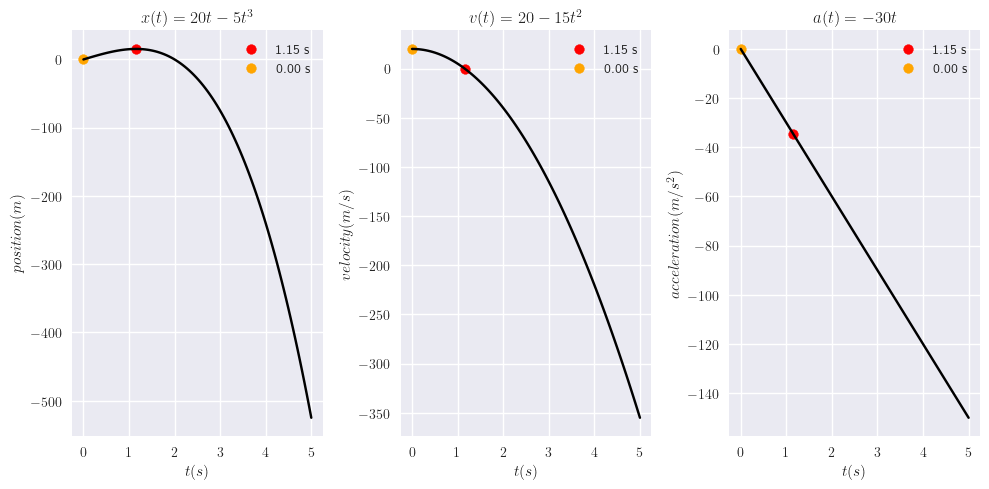

In [18]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

T = np.linspace(0,5,100)

t_a1 = float(sp.solve(v_20(t),t)[1])
t_b1 = float(sp.solve(a_20(t),t)[0])

ax[0].scatter(t_a1,x_20(t_a1), color='red', label=f'{t_a1:.2f} s')
ax[0].scatter(t_b1,x_20(t_b1), color='orange', label=f'{t_b1:.2f} s')
ax[0].plot(T, x_20(T), color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t) = 20t-5t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(t_a1,v_num19(t_a1), color='red',label=f'{t_a1:.2f} s')
ax[1].scatter(t_b1,v_num19(t_b1), color='orange',label=f'{t_b1:.2f} s')
ax[1].plot(T, v_num19(T), color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = 20-15t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(t_a1,a_num19(t_a1), color='red',label=f'{t_a1:.2f} s')
ax[2].scatter(t_b1,a_num19(t_b1), color='orange',label=f'{t_b1:.2f} s')
ax[2].plot(T, a_num19(T), color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t) = -30t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

----------------------------------------------------------------------------------------

# 21

From $t = 0$ to $t = 5.00$ min, a man stands still, and from $t = 5.00$ min to $t = 10.0$ min, he walks briskly in a straight line at a constant speed of $2.20 m/s$. What are (a) his average velocity $v_{avg}$ and (b) his average acceleration $a_{avg}$ in the time interval $2.00$ min to $8.00$ min? What are (c) $v_{avg}$ and (d) $a_{avg}$ in the time interval $3.00$ min to $9.00$ min? (e) Sketch $x$ versus $t$ and $v$ versus $t$, and indicate how the answers to (a) through (d) can be obtained from the graphs.

$$ t_1 = 0 s \ \ \ \ \ \  t_2 = 5.00 \ min = 300 s \ \ \ \ \ v_1 = 0 \ m/s$$
$$ t_1 = 5.00 \ min = 300 s \ \ \ \ \ \  t_2 = 10.00 \ min = 600 s \ \ \ \ \ v_1 = 2.20 \ m/s $$

$$ 0s < t < 300s \ ; \ v = 0 m/s \ $$
$$ 300s < t < 600s \ ; \ v = 2.20 \ m/s$$

(a)

$$ V_{avg} = \frac{x(8.00 min) - x(2.00 min)}{8.00 min - 2.00 min} $$ 
$$ V_{avg} = \frac{v(8.00 min - 5.00 min).3.00 min - v(2.00 min).2.00 min}{8.00 min - 2.00 min} $$
$$ V_{avg} = \frac{v(3.00 min).3.00 min - 0}{6.00 min} = \frac{(396 - 0)m}{360s} $$

In [19]:
print(f'V_avg = {(396/360)} m/s')
print(f'V_avg = {(396/360):.2f} m/s')

V_avg = 1.1 m/s
V_avg = 1.10 m/s


(b)

$$ a_{avg} = \frac{v(8.00 min) - v(2.00 min)}{8.00 min - 2.00 min} = \frac{(2.20 - 0)m/s}{360s} $$ 


In [20]:
print(f'a_avg = {(2.20/360)} m/s^2')
print(f'a_avg = {(2.20/360):.2f} m/s^2')

a_avg = 0.006111111111111111 m/s^2
a_avg = 0.01 m/s^2


(c)

$$ V_{avg} = \frac{x(9.00 min) - x(3.00 min)}{9.00 min - 3.00 min} $$ 
$$ V_{avg} = \frac{v(9.00 min,3.00 min).6.00 min - v(3.00 min).3.00 min}{9.00 min - 3.00 min} $$
$$ V_{avg} = \frac{(2.20 m/s).4.00 min - 0}{6.00 min} = \frac{(528 - 0)m}{360s} $$

In [21]:
print(f'v_avg = {(528/360)} m/s')
print(f'v_avg = {(528/360):.2f} m/s')

v_avg = 1.4666666666666666 m/s
v_avg = 1.47 m/s


(d)

$$ a_{avg} = \frac{v(9.00 min) - v(3.00 min)}{9.00 min - 3.00 min} = \frac{(2.20 - 0)m/s}{360s} $$ 

In [22]:
print(f'a_avg = {(2.20/360)} m/s^2')
print(f'a_avg = {(2.20/360):.2f} m/s^2')

a_avg = 0.006111111111111111 m/s^2
a_avg = 0.01 m/s^2


(e) This is still a problem, I will fix it later!

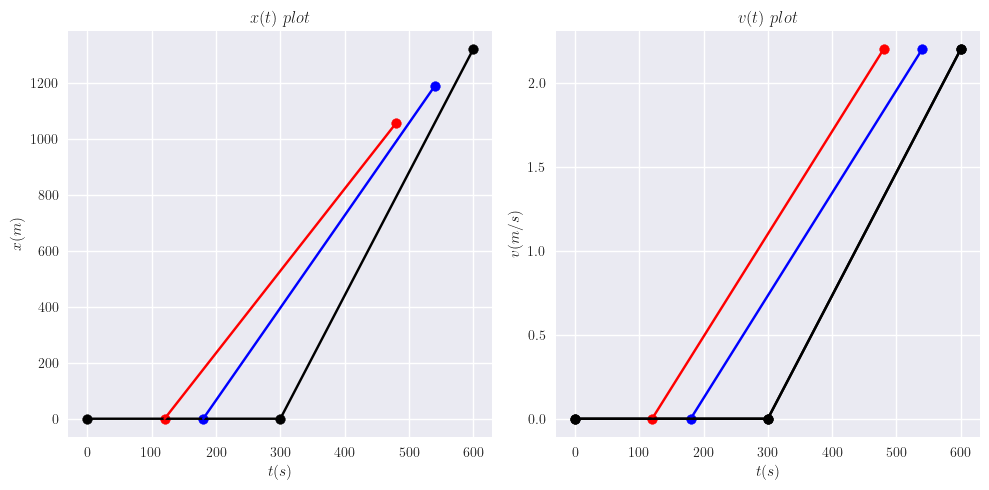

In [23]:
t_21 = np.array([0,5,10]) * 60
v_21 = np.array([0,0,2.20])
x_21 = v_21 * t_21

t_21abc = np.array([[2,8],[3,9]]) * 60
v_21abc = np.array([[0,2.20],[0,2.20]])
x_21ab = v_21abc[0][:] * t_21abc[0][:]
x_21cd = v_21abc[1][:] * t_21abc[1][:]

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(t_21,x_21, color='black')
ax[0].plot(t_21,x_21, color='black')
ax[0].scatter(t_21abc[0][:],x_21ab,color='red')
ax[0].plot(t_21abc[0][:],x_21ab, color='red')
ax[0].scatter(t_21abc[1][:],x_21cd,color='blue')
ax[0].plot(t_21abc[1][:],x_21cd, color='blue')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$x(m)$')
ax[0].set_title(r'$x(t) \ plot$')
ax[0].grid(True)

ax[1].scatter(t_21,v_21, color='black')
ax[1].plot(t_21,v_21, color='black')
ax[1].scatter(t_21abc[0][:],v_21abc[0][:],color='red')
ax[1].plot(t_21abc[0][:],v_21abc[0][:], color='red')
ax[1].scatter(t_21abc[1][:],v_21abc[1][:],color='blue')
ax[1].plot(t_21abc[1][:],v_21abc[1][:], color='blue')
ax[1].plot(t_21, v_21, color='black')
ax[1].scatter(t_21,v_21, color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$v(m/s)$')
ax[1].set_title(r'$v(t) \ plot$')
ax[1].grid(True)

plt.tight_layout()

----------------------------------------------------------------------------------------

# 22

(a) : $ \frac{m}{s^2} \\ $
(b) : $ \frac{m}{s^3} $

In [24]:
t = sp.Symbol('t')

def x_22(t):
    c = 3.0 ; b = 2.0 
    return c*t**2-b*t**3

def v_22(t): return sp.diff(x_22(t),t)
def a_22(t): return sp.diff(v_22(t),t)

v_num22 = sp.lambdify(t,v_22(t),'numpy')
a_num22 = sp.lambdify(t,a_22(t),'numpy')

(c)

In [25]:
print(f'(c): {sp.solve(v_22(t),t)[0]:.2f} s ,{sp.solve(v_22(t),t)[1]:.2f} s')

(c): 0.00 s ,1.00 s


(d)

In [26]:
print(f'x(4.0): {x_22(4.0)} m')
print(f'x(0.0): {x_22(0.0)} m')

#print(f'The total path length: {}')

x(4.0): -80.0 m
x(0.0): 0.0 m


(e)

In [27]:
print(f'delta_x: x(4.0) - x(0.0) = {x_22(4.0)} - {x_22(0.0)}  = {x_22(4.0) - x_22(0.0)} m ')

delta_x: x(4.0) - x(0.0) = -80.0 - 0.0  = -80.0 m 


(f,g,h,i,j,k,l)

In [28]:
print(f'(f): {v_num22(1.0)} m/s')
print(f'(g): {v_num22(2.0)} m/s')
print(f'(h): {v_num22(3.0)} m/s')
print(f'(i): {v_num22(4.0)} m/s')

print(f'(j): {a_num22(1.0)} m/s^2')
print(f'(k): {a_num22(2.0)} m/s^2')
print(f'(l): {a_num22(3.0)} m/s^2')
print(f'(m): {a_num22(4.0)} m/s^2')

(f): 0.0 m/s
(g): -12.0 m/s
(h): -36.0 m/s
(i): -72.0 m/s
(j): -6.0 m/s^2
(k): -18.0 m/s^2
(l): -30.0 m/s^2
(m): -42.0 m/s^2


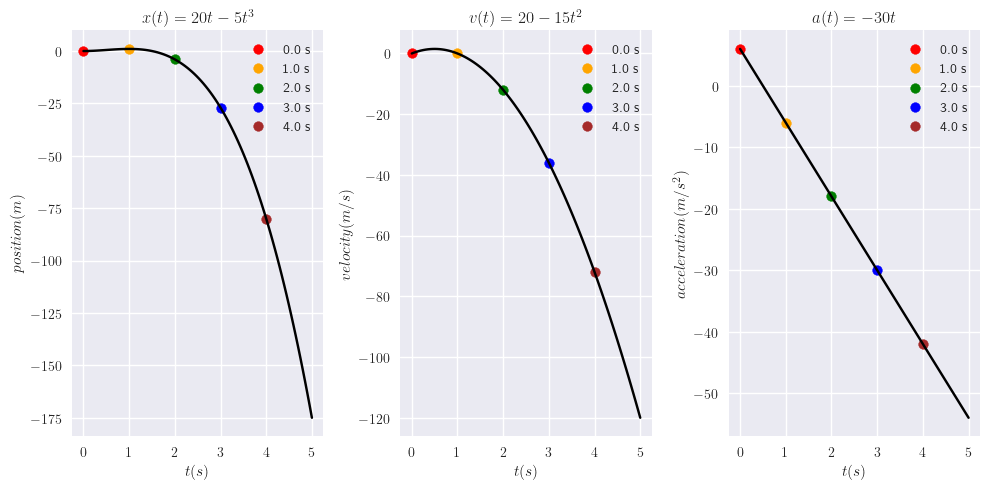

In [29]:
t = np.array([0,1.0,2.0,3.0,4.0])

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].scatter(t[0],x_22(t[0]), color='red', label=f'{t[0]} s')
ax[0].scatter(t[1],x_22(t[1]), color='orange', label=f'{t[1]} s')
ax[0].scatter(t[2],x_22(t[2]), color='green', label=f'{t[2]} s')
ax[0].scatter(t[3],x_22(t[3]), color='blue', label=f'{t[3]} s')
ax[0].scatter(t[4],x_22(t[4]), color='brown', label=f'{t[4]} s')
ax[0].plot(T, x_22(T), color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t) = 20t-5t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(t[0],v_num22(t[0]), color='red', label=f'{t[0]} s')
ax[1].scatter(t[1],v_num22(t[1]), color='orange', label=f'{t[1]} s')
ax[1].scatter(t[2],v_num22(t[2]), color='green', label=f'{t[2]} s')
ax[1].scatter(t[3],v_num22(t[3]), color='blue', label=f'{t[3]} s')
ax[1].scatter(t[4],v_num22(t[4]), color='brown', label=f'{t[4]} s')
ax[1].plot(T, v_num22(T), color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = 20-15t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(t[0],a_num22(t[0]), color='red', label=f'{t[0]} s')
ax[2].scatter(t[1],a_num22(t[1]), color='orange', label=f'{t[1]} s')
ax[2].scatter(t[2],a_num22(t[2]), color='green', label=f'{t[2]} s')
ax[2].scatter(t[3],a_num22(t[3]), color='blue', label=f'{t[3]} s')
ax[2].scatter(t[4],a_num22(t[4]), color='brown', label=f'{t[4]} s')
ax[2].plot(T, a_num22(T), color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t) = -30t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

----------------------------------------------------------------------------------------

# 23

$$ a = \frac{v_1^2 - v_0^2}{2L} $$

In [30]:
v_0 = 1.5*10**5
v_1 = 5.7*10**6
L = 0.01

print(f'a = {(v_1**2 - v_0**2)/(2*L):.2e} m/s^2')

a = 1.62e+15 m/s^2


In [31]:
%%manim -v WARNING  --progress_bar None  -r 1920,1080  --disable_caching electron
from manim import *
config.media_embed = True

class electron(Scene):
    def construct(self):
        self.camera.background_color = BLACK

        point = Dot(radius=0.15).shift(7.5 * LEFT)
        sq1 = Square(side_length=0.8).shift(1*UP)
        sq2 = Square(side_length=0.8).shift(1*DOWN)
        b = TracedPath(point.get_center, dissipating_time=0.1, stroke_opacity=[1, 0],color=GREEN)

        sq1.set_fill(False) ; sq1.set_stroke(WHITE)
        sq2.set_fill(False) ; sq2.set_stroke(WHITE)
        point.set_fill(GREEN,opacity=1)

        text1 = Text("acceleration is constant",font_size=30).shift(3 * UP)
        text2 = Tex(r"$v_0 = 1.50 \times 10^5 \frac{m}{s}$").scale(1)
        text3 = Tex(r"$v_1 = 5.70 \times 10^6 \frac{m}{s}$").scale(1)
        text2.shift(3 * LEFT,2.5*DOWN)
        text3.shift(3 * RIGHT,2.5*DOWN)

        line = DashedLine(
            start = LEFT * 7.5,
            end = RIGHT * 7.5 ,
            color = GREEN_A
        )


        self.play(Write(text1),reverse=True)
        self.play(Create(sq1),Create(sq2))
        self.play(Write(text2),Write(text3))
        self.play(Create(point),Create(line))
        self.add(point,b)
        
        def update_point(mob, dt):
            if mob.get_x() < 0:  
                mob.shift(RIGHT * 7.5 * dt)
            else:               
                mob.shift(RIGHT * 7.5 * 3.8 * dt)
        point.add_updater(update_point)
        self.wait(2)


'%%manim -v WARNING  --progress_bar None  -r 1920,1080  --disable_caching electron\nfrom manim import *\nconfig.media_embed = True\n\nclass electron(Scene):\n    def construct(self):\n        self.camera.background_color = BLACK\n\n        point = Dot(radius=0.15).shift(7.5 * LEFT)\n        sq1 = Square(side_length=0.8).shift(1*UP)\n        sq2 = Square(side_length=0.8).shift(1*DOWN)\n        b = TracedPath(point.get_center, dissipating_time=0.1, stroke_opacity=[1, 0],color=GREEN)\n\n        sq1.set_fill(False) ; sq1.set_stroke(WHITE)\n        sq2.set_fill(False) ; sq2.set_stroke(WHITE)\n        point.set_fill(GREEN,opacity=1)\n\n        text1 = Text("acceleration is constant",font_size=30).shift(3 * UP)\n        text2 = Tex(r"$v_0 = 1.50 \times 10^5 \x0crac{m}{s}$").scale(1)\n        text3 = Tex(r"$v_1 = 5.70 \times 10^6 \x0crac{m}{s}$").scale(1)\n        text2.shift(3 * LEFT,2.5*DOWN)\n        text3.shift(3 * RIGHT,2.5*DOWN)\n\n        line = DashedLine(\n            start = LEFT * 7

----------------------------------------------------------------------------------------

# 24

<p align="justify" style="font-family: Cambria"> Catapulting mushrooms. Certain mushrooms launch their spores by a catapult mechanism. As water condenses from the air onto a spore that is attached to the mushroom, a drop grows on one side of the spore and a film grows on the other side. The spore is bent over by the drop’s weight, but when the film reaches the drop, the drop’s water suddenly spreads into the film and the spore springs upward so rapidly that it is slung off into the air. Typically, the spore reaches a speed of 1.6 m/s in a 5.0 μm launch; its speed is then reduced to zero in 1.0 mm by the air. Using those data and assuming constant accelerations, find the acceleration in terms of g during (a) the launch and (b)
the speed reduction. <p>

<video controls src="shot fungus.mp4" title="Title"></video>

(a,b)

$$ a = \frac{v_1^2 - v_0^2}{2x} $$

In [32]:
print(f'(a): a = {((1.6**2)/(2*5.0*10**(-6))) / 9.8 :.1e}g m/s^2')
print(f'(b): a = {((0-1.6**2)/(2*1.0*10**(-3))) / 9.8 :.1e}g m/s^2')

(a): a = 2.6e+04g m/s^2
(b): a = -1.3e+02g m/s^2


----------------------------------------------------------------------------------------

# 25

An electric vehicle starts from rest and accelerates at a rate of $2.0 m/s^2$ in a straight line until it reaches a speed of $20 m/s$. The vehicle then slows at a constant rate of $1.0 m/s^2$ until it stops.

(a) How much time elapses from start to stop?

(b) How far does the vehicle travel from start to stop?

![Frame 9.png](<attachment:Frame 9.png>)
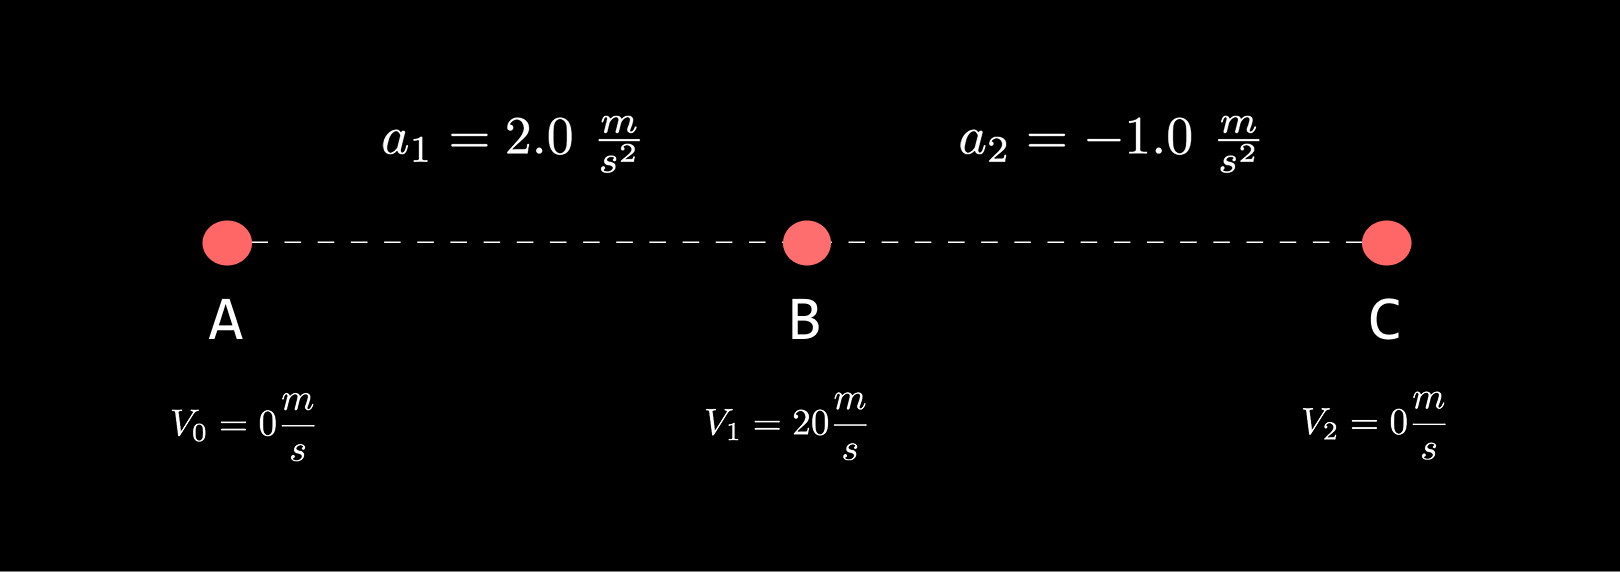

(a)

$$ d_{AB} = \frac{v_1^2 - v_0^2}{2a_1}  \ \ , \ \ d_{BC} = \frac{v_2^2 - v_1^2}{2a_2}  \ \ \ \ \ (0)$$

$$ \frac{1}{2}a_1t_1^2 + v_0t_1 + x_0 = d_{AB} \ ; \ (x_0 = 0) \ \ (1) $$
$$ v_2 = v_1 + a_2t_2 \implies t_2 = \frac{v_2-v_1}{a_2} \ \ \ \ \ \ (2) $$

In [33]:
a_1 = 2.0 ; a_2 = -1.0 ; v_0 = 0 ; v_1 = 20 ; v_2 = 0

solve 1&2 equation

In [34]:
d_AB = (v_1**2 - v_0**2)/(2*a_1)
def eq1(t_1,a_1,v_0,d_AB): return 1/2*a_1*t_1**2 + v_0*t_1 - d_AB 

In [35]:
t_1 = sp.symbols('t_1')
t_1 = sp.solve(eq1(t_1,a_1,v_0,d_AB),t_1)[1]
t_2 = (v_2-v_1) / a_2
print(f'(a): {t_1 + t_2:.1f} s')

(a): 30.0 s


(b)

In [36]:
d_BC = (v_2**2 - v_1**2)/(2*a_2)
print(f'd_total = {d_AB + d_BC} m')

d_total = 300.0 m


----------------------------------------------------------------------------------------

# 26

![Frame 10.png](<attachment:Frame 10.png>)
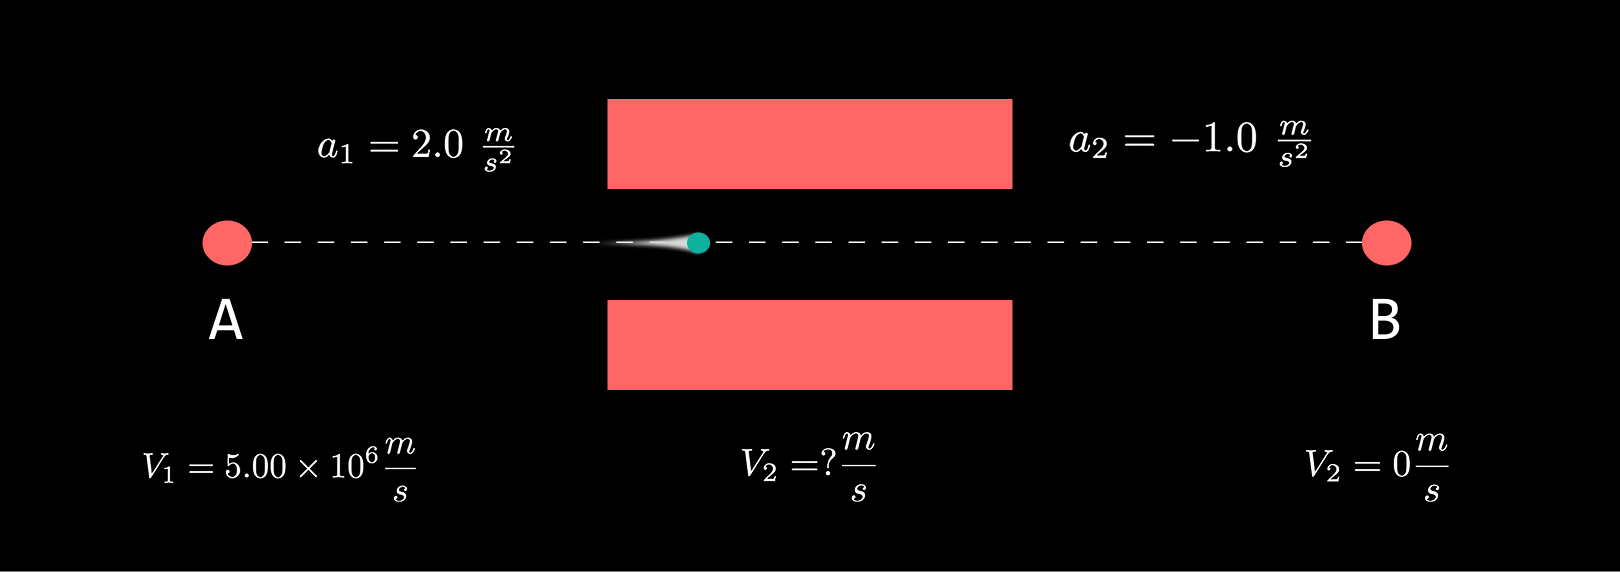

A muon (an elementary particle) enters a region with a speed of $ 5.00 \times 106 \frac{m}{s} $ and then is slowed at the rate of $ 1.25 \times 1014 \frac{m}{s^2} $.

(a) How far does the muon take to stop?

(b) Graph $x$ versus $t$ and $v$ versus $t$ for the muon.